<a href="https://colab.research.google.com/github/YuzhouLin/current_proj/blob/feature-20210203-devtest/plot_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [86]:
def get_acc(model, sb):
    
    day_n_list = []
    time_n_list = []
    trial_n_list = []
    acc_list = []
    
    for day_n in range(1,6):
        for t_n in range(1,3):
            for T_n in range(1,13):
                tmp_R = pd.read_csv(os.getcwd()+f"/results/{model}/sb{sb}d{day_n}_t{t_n}_T{T_n}.csv")
                day_n_list.append(day_n)
                #time_n_list.append('morning') if t_n == 1 else time_n_list.append('afternoon')
                time_n_list.append(t_n)
                trial_n_list.append(T_n)
                acc_list.append(np.sum(tmp_R['actual'] == tmp_R['predict'])/len(tmp_R['predict']))
    
    n = len(acc_list)
    acc_dict={
            'model': [model]*n,
            'sb': [sb]*n,
            'day': day_n_list,
            'time': time_n_list,
            'trial': trial_n_list,
            'acc': acc_list
    }
    
    #df_new = pd.DataFrame(acc_dict, index=np.arange(0,n,1))
    df = pd.DataFrame(acc_dict)
    return df

filename = './results/acc_report.csv'
models = ['ecnn0', 'ecnn1', 'ecnn2', 'ecnn3', 'etcn1', 'etcn2', 'etcn3']

for i in models:
    df_new = get_acc(model=i, sb=1)
    if os.path.exists(filename):
        print('Update new')
        df = pd.read_csv(filename)
        df = df.append(df_new, ignore_index=True)
    else:
        print('Create new')
        df = df_new
    df.to_csv(filename, index=False)
    
df_acc = pd.read_csv('./results/acc_report.csv')

Create new
Update new
Update new
Update new
Update new
Update new
Update new


,model,sb,day,time,trial,acc
0,ecnn0,1,1,morning,1,0.984706
1,ecnn0,1,1,morning,2,0.988289
2,ecnn0,1,1,morning,3,0.789075
3,ecnn0,1,1,morning,4,0.984622
4,ecnn0,1,1,morning,5,0.989637
...,...,...,...,...,...,...
835,etcn3,1,5,afternoon,8,0.484647
836,etcn3,1,5,afternoon,9,0.563168
837,etcn3,1,5,afternoon,10,0.458573
838,etcn3,1,5,afternoon,11,0.556988


<AxesSubplot:xlabel='day,time'>

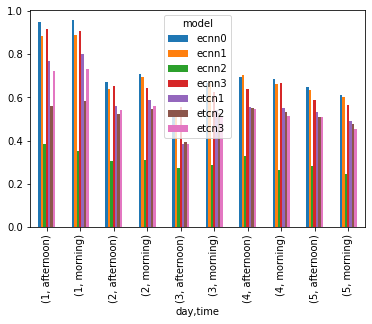

In [98]:
df_acc.groupby(['day', 'time','model']).mean().unstack().plot(kind='bar', y='acc')

<AxesSubplot:xlabel='day,time'>

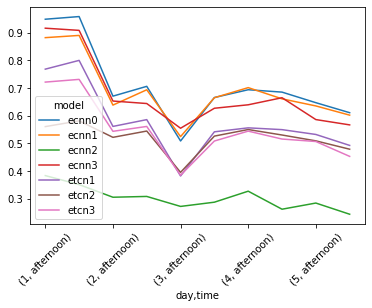

In [115]:
df_acc.groupby(['day', 'time','model']).mean().unstack().plot(kind='line', y='acc',rot=45)

'\ni=0\nfor ax in axes.ravel():\n    #sns.heatmap(CM[i], ax = ax, cmap=\'GnBu\')\n    sns.\n    colorbar = True if i==1 or i==3 else False\n    sns.heatmap(CM_model_ave[i], ax = ax, annot=True, cmap=\'Blues\', vmax=1, vmin=0, fmt=\'.2%\', annot_kws={\'size\': 4}, cbar=colorbar)\n    i+=1\n\n\nlabels = [\'CNN\',\'ECNN-A\',\'ECNN-B\',\'ECNN-C\']\nfor ax, label in zip(axes.ravel(), labels):\n    ax.set_title(label,loc=\'center\', fontdict={\'fontsize\': 8})\n    ax.set_xlabel(\'Predicted Finger Movement\', fontdict={\'fontsize\': 8})\n    ax.set_ylabel(\'Acutal Finger Movement\', fontdict={\'fontsize\': 8})\n\nplt.savefig("./results/confusion_matrix_macroave.eps", format=\'eps\', bbox_inches=\'tight\', dpi=600, pad_inches=0.0)\nplt.savefig("./results/confusion_matrix_macroave.png", format=\'png\', bbox_inches=\'tight\', dpi=600, pad_inches=0.0)\n'

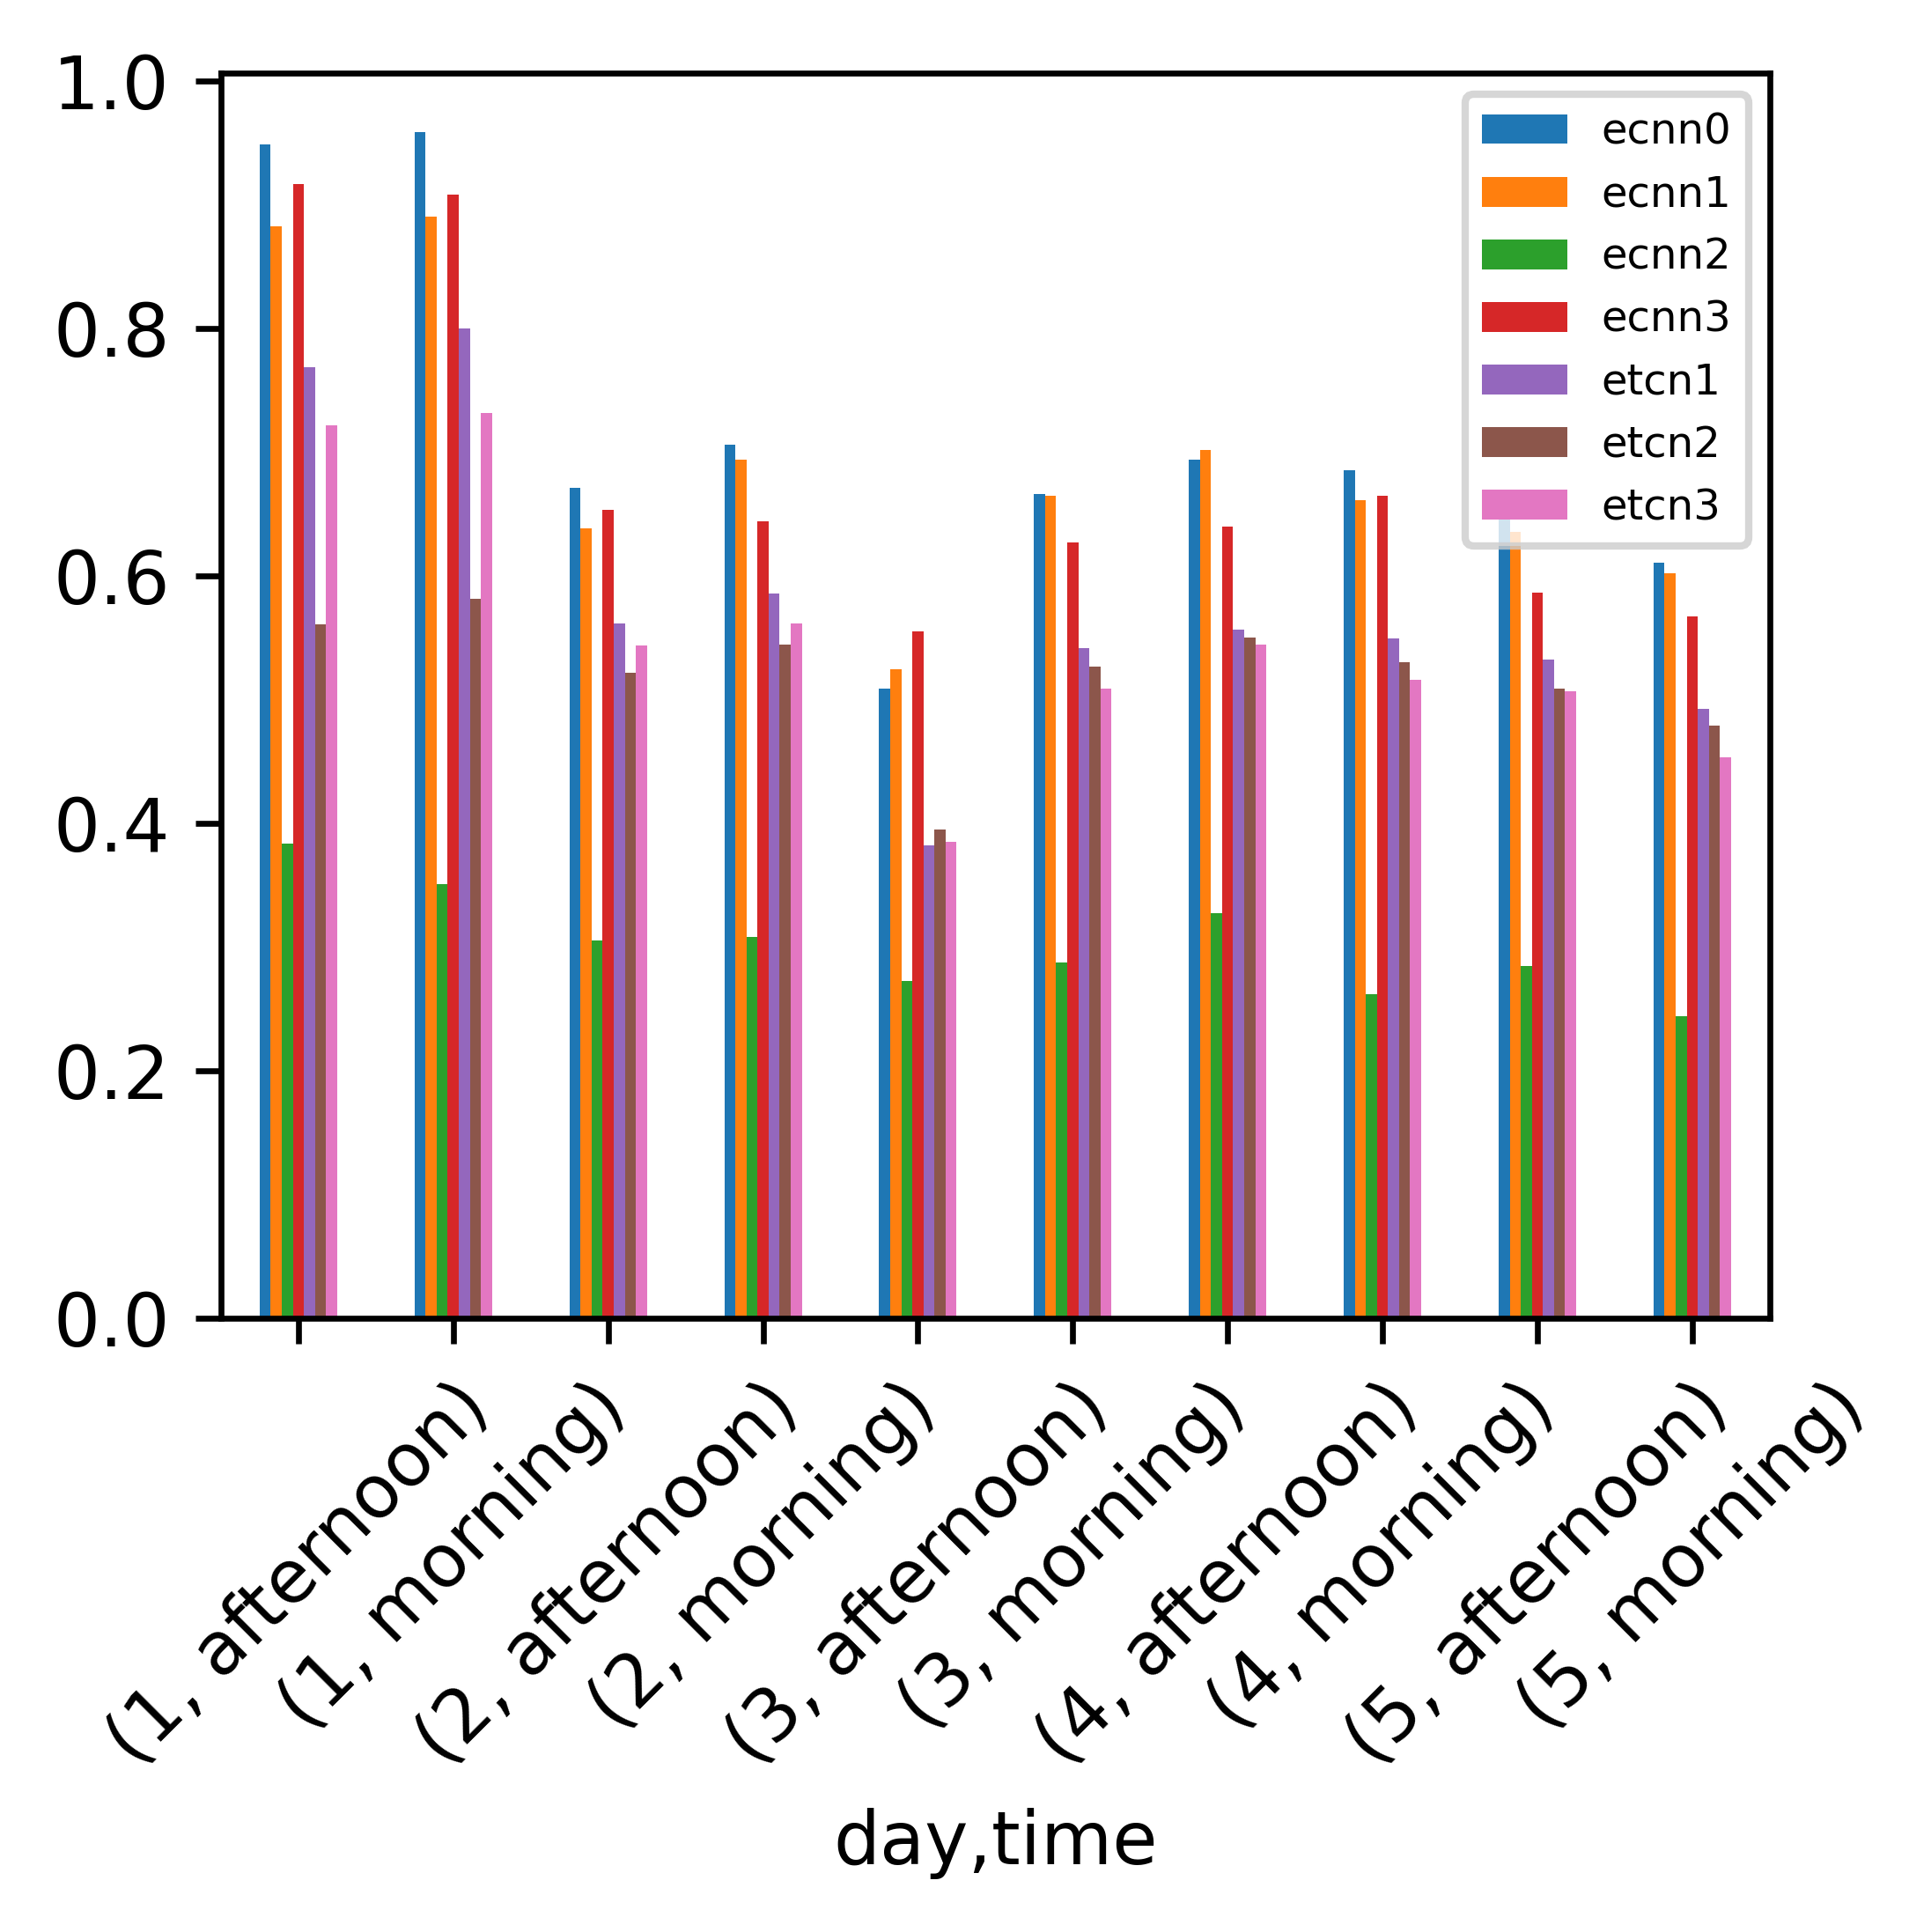

In [107]:

fig, ax = plt.subplots(1,1, figsize = (7.08/2, 7.08/2), constrained_layout=True,dpi=600)
df_acc.groupby(['day', 'time','model']).mean().unstack().plot(kind='bar', y='acc', ax=ax, rot=45)
ax.legend(loc='best', fontsize='xx-small')

#f, axes = plt.subplots(1,1, figsize = (7.08/2, 7.08/2), constrained_layout=True,dpi=600)

#df_acc.groupby('model').boxplot(x='day',y='acc')

#df_acc.loc[df_acc['model']=='ecnn0'].boxplot(column = ['acc'], by=['day', 'time'], rot=45)

#df_acc.loc[df_acc['model']=='ecnn0'].boxplot(column = ['acc'], by=['day', 'time'], rot=45)
#for ax in axes.ravel():
#    ax = df_acc.plot.bar(x='day', y='acc')

'''
i=0
for ax in axes.ravel():
    #sns.heatmap(CM[i], ax = ax, cmap='GnBu')
    sns.
    colorbar = True if i==1 or i==3 else False
    sns.heatmap(CM_model_ave[i], ax = ax, annot=True, cmap='Blues', vmax=1, vmin=0, fmt='.2%', annot_kws={'size': 4}, cbar=colorbar)
    i+=1


labels = ['CNN','ECNN-A','ECNN-B','ECNN-C']
for ax, label in zip(axes.ravel(), labels):
    ax.set_title(label,loc='center', fontdict={'fontsize': 8})
    ax.set_xlabel('Predicted Finger Movement', fontdict={'fontsize': 8})
    ax.set_ylabel('Acutal Finger Movement', fontdict={'fontsize': 8})

plt.savefig("./results/confusion_matrix_macroave.eps", format='eps', bbox_inches='tight', dpi=600, pad_inches=0.0)
plt.savefig("./results/confusion_matrix_macroave.png", format='png', bbox_inches='tight', dpi=600, pad_inches=0.0)
'''

In [17]:
os.getcwd()

'c:\\Users\\57600\\github\\TCN-proj'